# Домашнее задание к лекции "Визуализация данных"

## Обязательная часть

Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных. 

Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; 
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

**Откуда брать данные?**

Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com/)) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:
- [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps);
- [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new);
- [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness).


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

[Данные о COVID-19 в Индии](https://www.kaggle.com/sudalairajkumar/covid19-in-india?select=covid_19_india.csv)

In [2]:
#df = pd.read_csv('googleplaystore.csv',sep=',')
df = pd.read_csv('covid_19_india.csv',sep=',')

In [35]:
df.head(3)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Year,Month
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,2020,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,2020,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2020,2


In [47]:
def calc_date(col, t='y'):    
    #d = datetime.date(col)    
    if t == 'y':
        return int(col[:4])
    if t == 'm':
        return int(col[5:7])
    return d
df['Year'] = df.Date.apply(calc_date)
df['Month'] = df.Date.apply(calc_date,t='m')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15554 entries, 0 to 15553
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       15554 non-null  int64 
 1   Date                      15554 non-null  object
 2   Time                      15554 non-null  object
 3   State/UnionTerritory      15554 non-null  object
 4   ConfirmedIndianNational   15554 non-null  object
 5   ConfirmedForeignNational  15554 non-null  object
 6   Cured                     15554 non-null  int64 
 7   Deaths                    15554 non-null  int64 
 8   Confirmed                 15554 non-null  int64 
 9   Year                      15554 non-null  int64 
 10  Month                     15554 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 1.3+ MB


In [48]:
df.describe()

,Sno,Cured,Deaths,Confirmed,Year,Month
count,15554.000000,1.555400e+04,15554.000000,1.555400e+04,15554.000000,15554.000000
mean,7777.500000,1.898184e+05,2898.898804,2.110835e+05,2020.351807,6.119005
std,4490.197379,4.061648e+05,7637.201754,4.542665e+05,0.477549,3.281150
min,1.000000,0.000000e+00,0.000000,0.000000e+00,2020.000000,1.000000
25%,3889.250000,1.950250e+03,14.000000,3.177000e+03,2020.000000,4.000000
50%,7777.500000,2.141550e+04,374.000000,2.874900e+04,2020.000000,5.000000
75%,11665.750000,2.151482e+05,2527.000000,2.387830e+05,2021.000000,9.000000
max,15554.000000,5.395370e+06,95344.000000,5.746892e+06,2021.000000,12.000000


### Задание 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Кол-во людей, млн.')

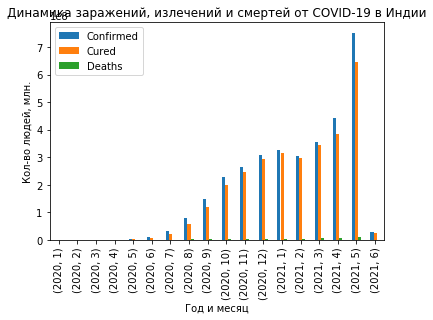

In [71]:
df.groupby(by=['Year','Month'])['Confirmed','Cured','Deaths'].sum().plot(kind='bar')
plt.title('Динамика заражений, излечений и смертей от COVID-19 в Индии')
plt.xlabel('Год и месяц')
plt.ylabel('Кол-во людей, млн.')

Наблюдаем две волны заражения, при этом, почти нет спада. Первая волна активный рост с июля 2020 года, небольшое сокращения в феврале 2021 года и существенно больший пикообразный рост с апреля 2021 года. С одновременным ростом смертности по сравнению с 2020 годом.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Кол-во людей, млн.')

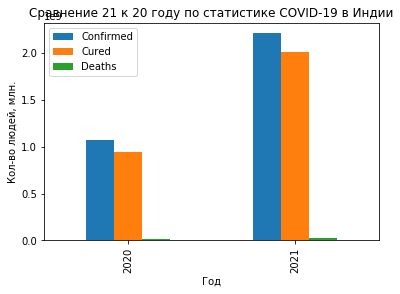

In [72]:
df.groupby(by=['Year'])['Confirmed','Cured','Deaths'].sum().plot(kind='bar')
plt.title('Сравнение 21 к 20 году по статистике COVID-19 в Индии')
plt.xlabel('Год')
plt.ylabel('Кол-во людей, млн.')

Видим изменения заражений, смертей и излечений в 20 и 21 году.В целом по Индии.
Сравнение год к году тоже дает информацию о скачкообразном росте во вторую волну.
за 4 месяца 2021 года кол-во заражений в 2 раза больше чем за 8 месяцев 2020года.

Text(0, 0.5, 'Кол-во людей')

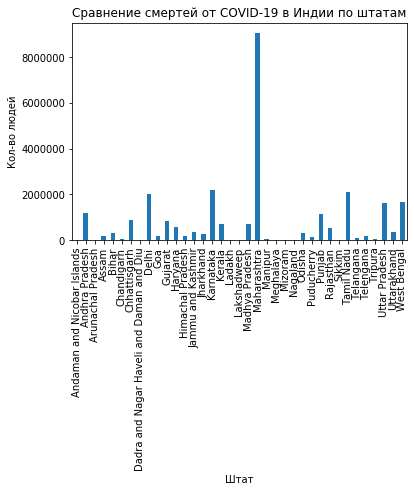

In [73]:
df[df['Year']==2021].groupby(by=['State/UnionTerritory'])['Deaths'].sum().plot(kind='bar')
plt.title('Сравнение смертей от COVID-19 в Индии по штатам')
plt.xlabel('Штат')
plt.ylabel('Кол-во людей')

Видно что есть несколько групп штатов с максимальной смертностью, лидирует Maharashtra.
К чему есть предпосылки, один из самых густо населенных штатов в мире. 
Высокая плотность населения. Много населения в городах более 42%.
Если сравнить с Karnataka, штат с высокой смертностью по сравнению с другими.
То в  нем населения в 2 раза меньше. Городское население только 31%. 
Что дает более низкие показатели смертности и распространения вируса.
Uttarakhand с низкими показателями сметрности обладает такойже площадь как Maharashtra
Но населения в 10 раз меньше и очень низкий % городского населения 23%.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Кол-во людей, млн.')

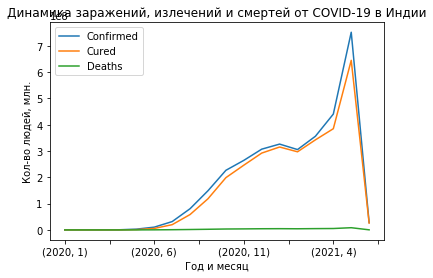

In [74]:
df.groupby(by=['Year','Month'])['Cured','Deaths','Confirmed'].agg({'Confirmed':'sum','Cured':'sum','Deaths':'sum'}).plot()
plt.title('Динамика заражений, излечений и смертей от COVID-19 в Индии')
plt.xlabel('Год и месяц')
plt.ylabel('Кол-во людей, млн.')

В целом видим соотвествующую картину динамики поражения вирусом населения, и волны с пикообразным ростом в апреле. 
Но на столбцатой диаграме данные нагляднее и работать с ними проще.

Text(0, 0.5, 'Кол-во людей')

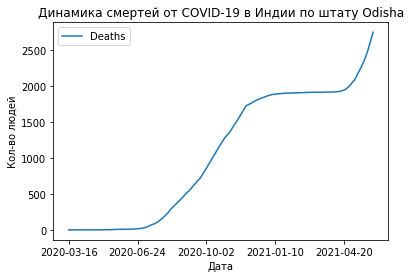

In [75]:
df[df['State/UnionTerritory'] =='Odisha'].plot(x='Date',y=['Deaths'])
plt.title('Динамика смертей от COVID-19 в Индии по штату Odisha')
plt.xlabel('Дата')
plt.ylabel('Кол-во людей')

Если взять штат с минимальных кол-вом смертей и заражений - Odisha. Мы увидим следующее:
    * Динамика волн заболевания и пикообразный рост в 21 году повторяют картину по стране.
    * Уровень смертности существенно ниже  высокого и среднего блока штатов по заболеванию.
При этом население штата не такое маленькое, но всего 14% городское, остальное сельское. 
Что играет ключевую роль в распространении болезни.

In [76]:
?df.plot

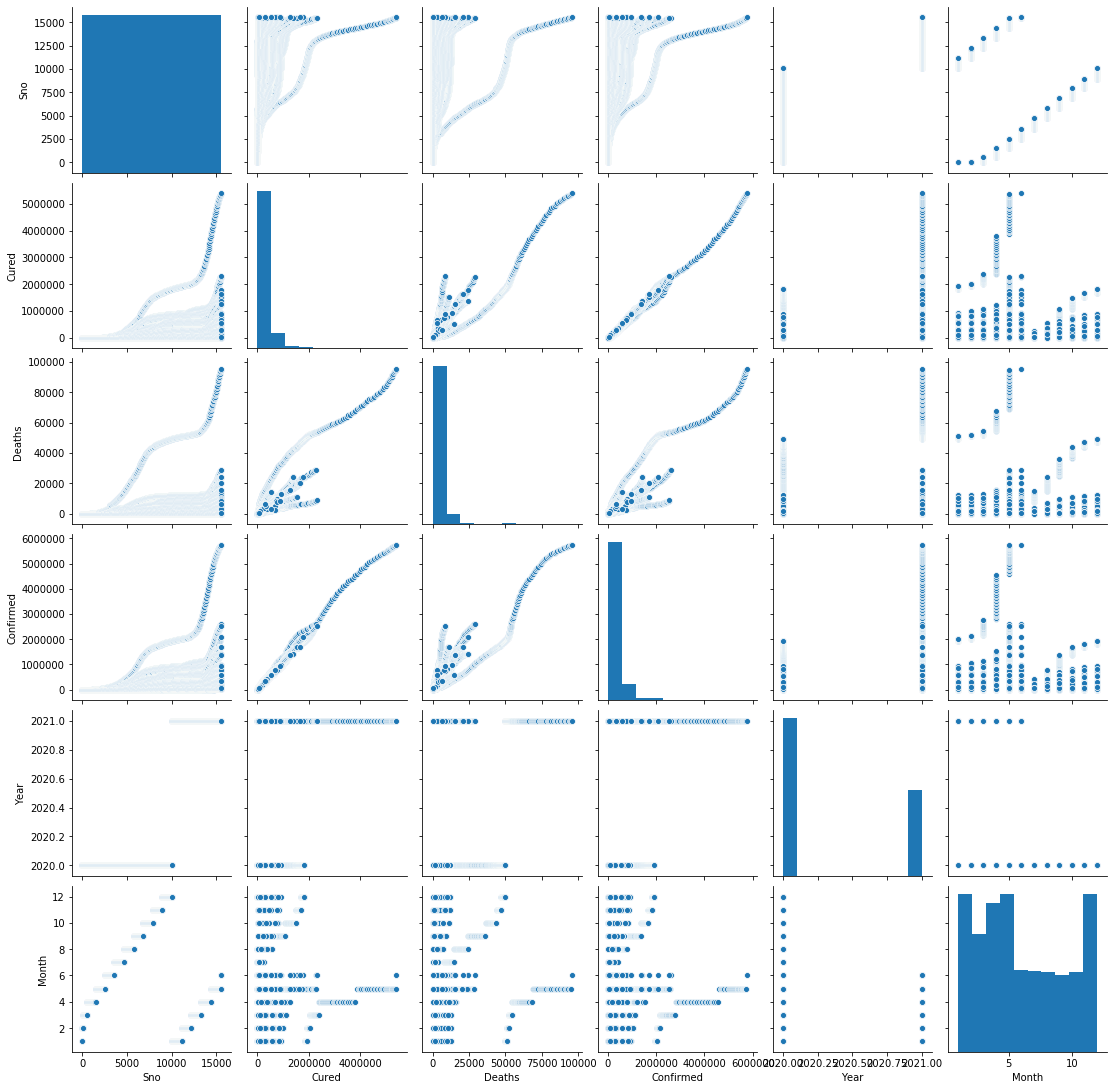

In [51]:
sb.pairplot(df)

По графику с попарным сравнением видна похожая картина как со столбцатой диаграмой. Видно что есть штат, где количество заражений и сметрей выше чем в остальных по стране. И явно видна 3 группы административных формаций с высоким, средним и низким кол-во заражений и смертей.
В дальнейшем данные штаты можно сгрупировать по "схожести" и анализировать отдельно. Как и самый крупный и густонаселенный штат Maharashtra. И по итогам использовать различные методы борьбы с вирусом и помощи людям.

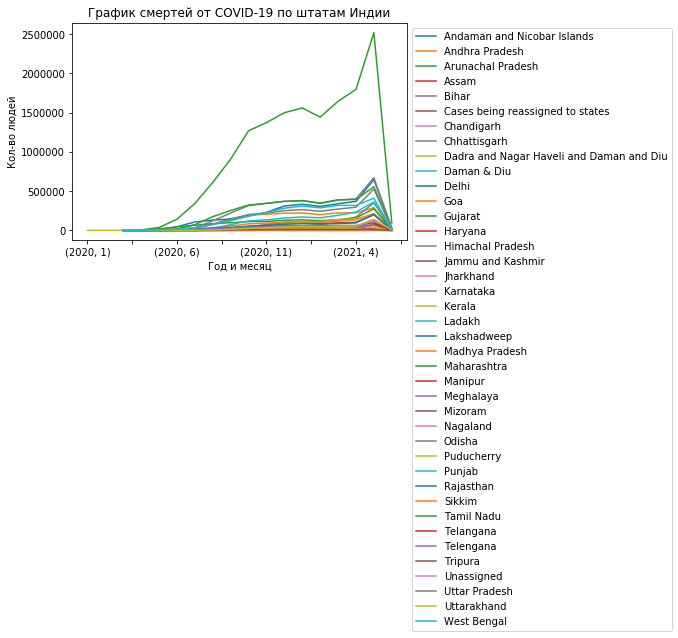

In [108]:
df.pivot_table(index=['Year','Month'],columns='State/UnionTerritory',values='Deaths',aggfunc='sum').plot(kind='line',legend=False,title='График смертей от COVID-19 по штатам Индии')
plt.xlabel('Год и месяц')
plt.ylabel('Кол-во людей')
plt.legend(bbox_to_anchor=(1, 1))

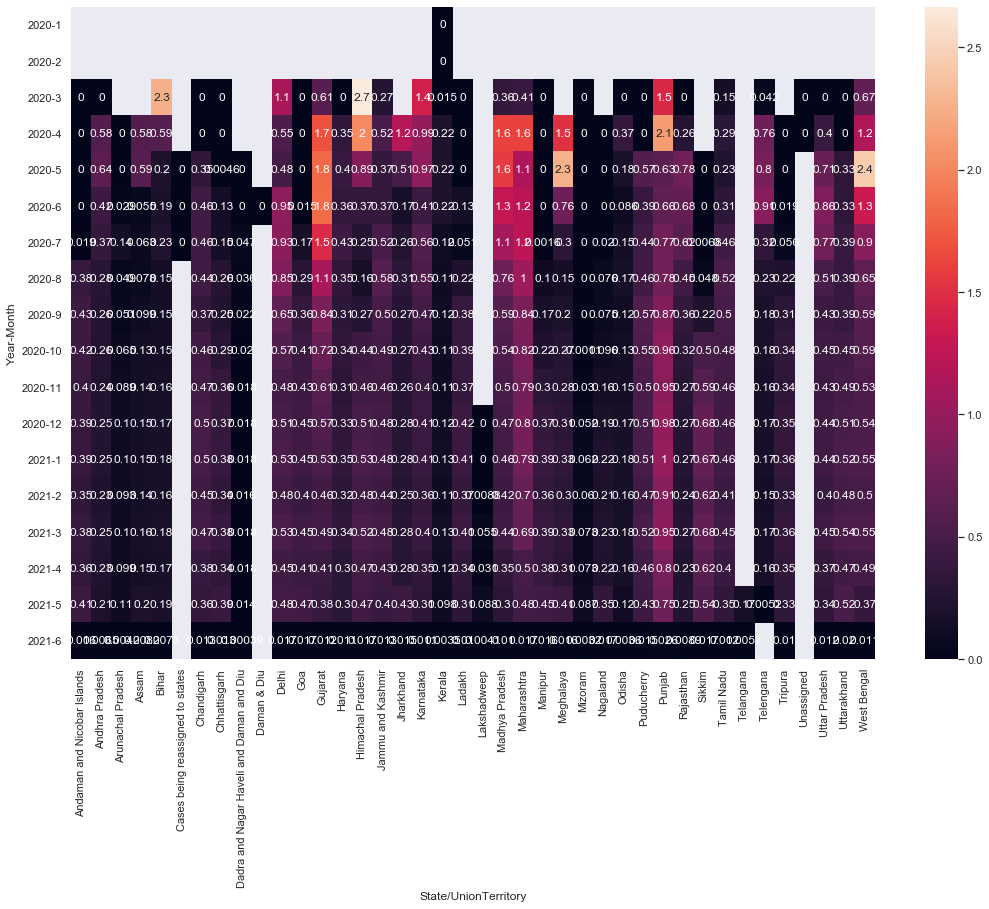

In [120]:
df['Dp']=df['Deaths']/df['Confirmed']
#df.pivot_table(index=['Year','Month'],columns='State/UnionTerritory',values='Dp',aggfunc='sum').plot(kind='bar',legend=False,stacked=True,title='График смертей от COVID-19 по штатам Индии')
#plt.xlabel('Год и месяц')
#plt.ylabel('Кол-во людей')
#plt.legend(bbox_to_anchor=(1, 1))
sb.set(rc={'figure.figsize':(18,12)})
sb.heatmap(df.pivot_table(index=['Year','Month'],columns='State/UnionTerritory',values='Dp',aggfunc='sum'),annot=True)

Построив тепловую карту по смертям, в долях от заболевших(подтвержденных) 
Можем увидеть не только динамику и штаты с максимальными проблемами не только в абсолютных показателях,
но и относитеьно заболевших людей.

При этом мы видим пики сметрности в 2020 году в штатах Bihar и Meghalia. 2,3% от кол-ва потвержденных заболевших.
По графикам выше видно что это штаты и группы штаток с низкой сметрностьюв абсолютных показателях, при этом относительно заболевших
в начале пандемии при росте 1й волны. у них наибольшая доля смертей.

При этом видно что в долях смертность выше в 2020 году по сравнению с 21. При этом сейчас наблюдается пик роста заболеваемости.
Нужно получить еще 2-4 месяца статистики чтобы правильно оценить предпосылки.
При этом в наибольшем штате смертность продалжает быть высокой(около 1%) 
Так же можно отметить штат со срденей смертностью Punjab, в 20 году был пик до 2,1%... Сейчас также держится около 1%.

Text(0, 0.5, 'Кол-во людей')

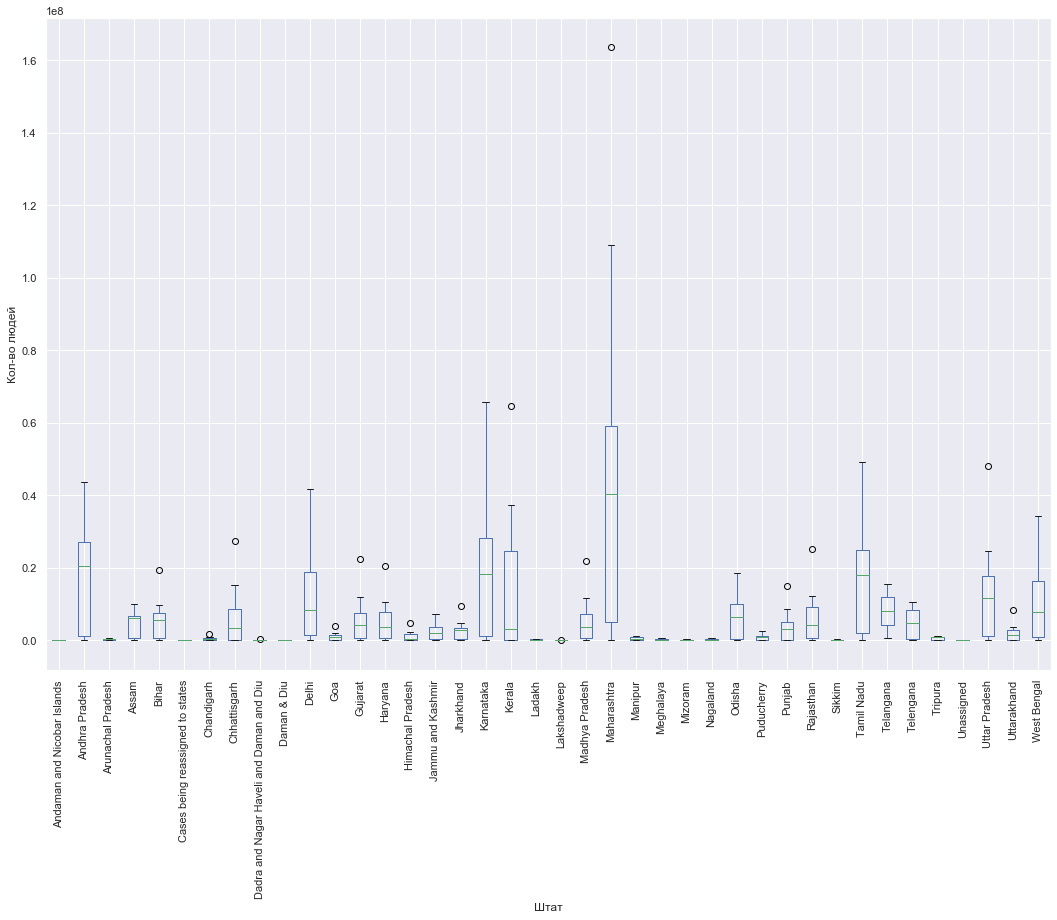

In [130]:
df.pivot_table(index=['Year','Month'],columns='State/UnionTerritory',values='Confirmed',aggfunc='sum').plot(kind='box',legend=False)
plt.xticks(rotation=90)
plt.xlabel('Штат')
plt.ylabel('Кол-во людей')

Построив бокс плот по заболеваемости в разрезе штатов в динамике можно оценить:
    * наиболее крупные(проблемные) штаты и провести их последующую группировку
    * тенденции выборок в штатах  и похожие по трендам
    * наличие выборосов, которые гоаорят в данной интерпритации о том какие основные територии дают всплекс в стране. Исходя
    из данной диаграмы можно выделить 10 територий которые наиболее проблемные с большим приростом(при текущем срезе данных)

### Дополнительная часть (необязательная)

* построить дополнительно не менее 2 визуализаций (итого не менее 6);
* в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;


#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой на репозиторий [GitHub](https://github.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.